In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures 

# Load the data 
data = pd.read_csv('climate_change.csv')
data.head()

,Year,Month,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols,Temp
0,1983,5,2.556,345.96,1638.59,303.677,191.324,350.113,1366.1024,0.0863,0.109
1,1983,6,2.167,345.52,1633.71,303.746,192.057,351.848,1366.1208,0.0794,0.118
2,1983,7,1.741,344.15,1633.22,303.795,192.818,353.725,1366.2850,0.0731,0.137
3,1983,8,1.130,342.25,1631.35,303.839,193.602,355.633,1366.4202,0.0673,0.176
4,1983,9,0.428,340.17,1648.40,303.901,194.392,357.465,1366.2335,0.0619,0.149


In [4]:
data.shape

(308, 11)

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,308.0,1995.662338,7.423197,1983.0000,1989.00000,1996.00000,2002.00000,2008.0000
Month,308.0,6.551948,3.447214,1.0000,4.00000,7.00000,10.00000,12.0000
MEI,308.0,0.275555,0.937918,-1.6350,-0.39875,0.23750,0.83050,3.0010
CO2,308.0,363.226753,12.647125,340.1700,353.02000,361.73500,373.45500,388.5000
CH4,308.0,1749.824513,46.051678,1629.8900,1722.18250,1764.04000,1786.88500,1814.1800
N2O,308.0,312.391834,5.225131,303.6770,308.11150,311.50700,316.97900,322.1820
CFC-11,308.0,251.973068,20.231783,191.3240,246.29550,258.34400,267.03100,271.4940
CFC-12,308.0,497.524782,57.826899,350.1130,472.41075,528.35600,540.52425,543.8130
TSI,308.0,1366.070759,0.399610,1365.4261,1365.71705,1365.98090,1366.36325,1367.3162
Aerosols,308.0,0.016657,0.029050,0.0016,0.00280,0.00575,0.01260,0.1494


In [9]:
data.isna().sum() 

Year        0
Month       0
MEI         0
CO2         0
CH4         0
N2O         0
CFC-11      0
CFC-12      0
TSI         0
Aerosols    0
Temp        0
dtype: int64

# Data Dict 

**Year:** the observation year.

**Month:** the observation month.

**Temp:** the difference in degrees Celsius between the average global temperature in that period and a reference value. This data comes from the Climatic Research Unit at the University of East Anglia.

**CO2, N2O, CH4, CFC.11, CFC.12:** atmospheric concentrations of carbon dioxide (CO2), nitrous oxide (N2O), methane  (CH4), trichlorofluoromethane (CCl3F; commonly referred to as CFC-11) and dichlorodifluoromethane (CCl2F2; commonly referred to as CFC-12), respectively. This data comes from the ESRL/NOAA Global Monitoring Division.

**CO2, N2O and CH4** are expressed in ppmv (parts per million by volume  – i.e., 397 ppmv of CO2 means that CO2 constitutes 397 millionths of the total volume of the atmosphere)

**CFC.11 and CFC.12** are expressed in ppbv (parts per billion by volume). 

**Aerosols:** the mean stratospheric aerosol optical depth at 550 nm. This variable is linked to volcanoes, as volcanic eruptions result in new particles being added to the atmosphere, which affect how much of the sun’s energy is reflected back into space. This data is from the Godard Institute for Space Studies at NASA.

**TSI:** the total solar irradiance (TSI) in W/m2 (the rate at which the sun’s energy is deposited per unit area). Due to sunspots and other solar phenomena, the amount of energy that is given off by the sun varies substantially with time. This data is from the SOLARIS-HEPPA project website.

In [10]:
# Then, split the data into a training set,
# consisting of all the observations up to and including 2006, and 
# a testing set consisting of the remaining years (hint: use subset).

# A training set refers to the data that will be used to build the model
# (this is the data we give to the lm() function), and
# a testing set refers to the data we will use to test our predictive ability.

# Next, build a linear regression model to predict the dependent variable Temp,
# using MEI, CO2, CH4, N2O, CFC.11, CFC.12, TSI, and 
# Aerosols as independent variables (Year and Month should NOT be used in the model).
# Use the training set to build the model.

# Enter the model R2 (the “Multiple R-squared” value):

# split data into training set: 
train = data[data['Year'] <= 2006] 
test = data[data['Year'] > 2006] 

In [11]:
# Implement linear regression model: 
X_train = train.drop(columns=['Year', 'Month', 'Temp']) 
y_train = train['Temp'] 

In [12]:
X_test = test.drop(columns=['Year', 'Month', 'Temp']) 
y_test = test['Temp'] 

In [13]:
climate_model = LinearRegression() 
climate_model.fit(X_train, y_train)

LinearRegression()

In [16]:
climate_model.score(X_train, y_train) 

0.7508932770523407

In [19]:
# # Model summary 
climate_model.coef_ 

array([ 6.42053134e-02,  6.45735927e-03,  1.24041896e-04, -1.65280033e-02,
       -6.63048889e-03,  3.80810324e-03,  9.31410835e-02, -1.53761324e+00])

In [12]:
# Get Model summary table 
model_summary = pd.DataFrame(climate_model.coef_, X_train.columns, columns=['Coefficient']) 
model_summary

,Coefficient
MEI,0.064205
CO2,0.006457
CH4,0.000124
N2O,-0.016528
CFC-11,-0.006630
CFC-12,0.003808
TSI,0.093141
Aerosols,-1.537613


In [13]:
#Which variables are significant in the model? 
#We will consider a variable signficant only if the p-value is below 0.05. (Select all that apply.)

# Get p-values 
import statsmodels.api as sm 
X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Temp   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.744
Method:                 Least Squares   F-statistic:                     103.6
Date:                Mon, 29 Apr 2024   Prob (F-statistic):           1.94e-78
Time:                        20:26:21   Log-Likelihood:                 280.10
No. Observations:                 284   AIC:                            -542.2
Df Residuals:                     275   BIC:                            -509.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -124.5943     19.887     -6.265      0.000    -163.744     -85.445
MEI            0.0642      0.006      9.923      0.000       0.051       0.077
CO2            0.0065      0.002      2.826      0.005       0.002       0.011
CH4            0.0001      0.001      0.240      0.810      -0.001       0.001
N2O           -0.0165      0.009     -1.930      0.055      -0.033       0.000
CFC-11        -0.0066      0.002     -4.078      0.000      -0.010      -0.003
CFC-12         0.0038      0.001      3.757      0.000       0.002       0.006
TSI            0.0931      0.015      6.313      0.000       0.064       0.122
Aerosols      -1.5376      0.213     -7.210      0.000      -1.957      -1.118
==============================================================================
Omnibus:                        8.740   Durbin-Watson:                   0.956
Prob(Omnibus):                  0.013   Jarque-Bera (JB):               10.327
Skew:                           0.289   Prob(JB):                      0.00572
Kurtosis:                       3.733   Cond. No.                     8.53e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.53e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [21]:
# Compute the correlations between all the variables in the training set.
# Which of the following independent variables is N2O highly correlated with
# (absolute correlation greater than 0.7)? Select all that apply.

# Compute correlations 
correlation_matrix = train.corr() 
correlation_matrix

,Year,Month,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols,Temp
Year,1.000000,-0.027942,-0.036988,0.982749,0.915659,0.993845,0.569106,0.897012,0.170302,-0.345247,0.786797
Month,-0.027942,1.000000,0.000885,-0.106732,0.018569,0.013632,-0.013111,0.000675,-0.034606,0.014890,-0.099857
MEI,-0.036988,0.000885,1.000000,-0.041147,-0.033419,-0.050820,0.069000,0.008286,-0.154492,0.340238,0.172471
CO2,0.982749,-0.106732,-0.041147,1.000000,0.877280,0.976720,0.514060,0.852690,0.177429,-0.356155,0.788529
CH4,0.915659,0.018569,-0.033419,0.877280,1.000000,0.899839,0.779904,0.963616,0.245528,-0.267809,0.703255
N2O,0.993845,0.013632,-0.050820,0.976720,0.899839,1.000000,0.522477,0.867931,0.199757,-0.337055,0.778639
CFC-11,0.569106,-0.013111,0.069000,0.514060,0.779904,0.522477,1.000000,0.868985,0.272046,-0.043921,0.407710
CFC-12,0.897012,0.000675,0.008286,0.852690,0.963616,0.867931,0.868985,1.000000,0.255303,-0.225131,0.687558
TSI,0.170302,-0.034606,-0.154492,0.177429,0.245528,0.199757,0.272046,0.255303,1.000000,0.052117,0.243383
Aerosols,-0.345247,0.014890,0.340238,-0.356155,-0.267809,-0.337055,-0.043921,-0.225131,0.052117,1.000000,-0.384914


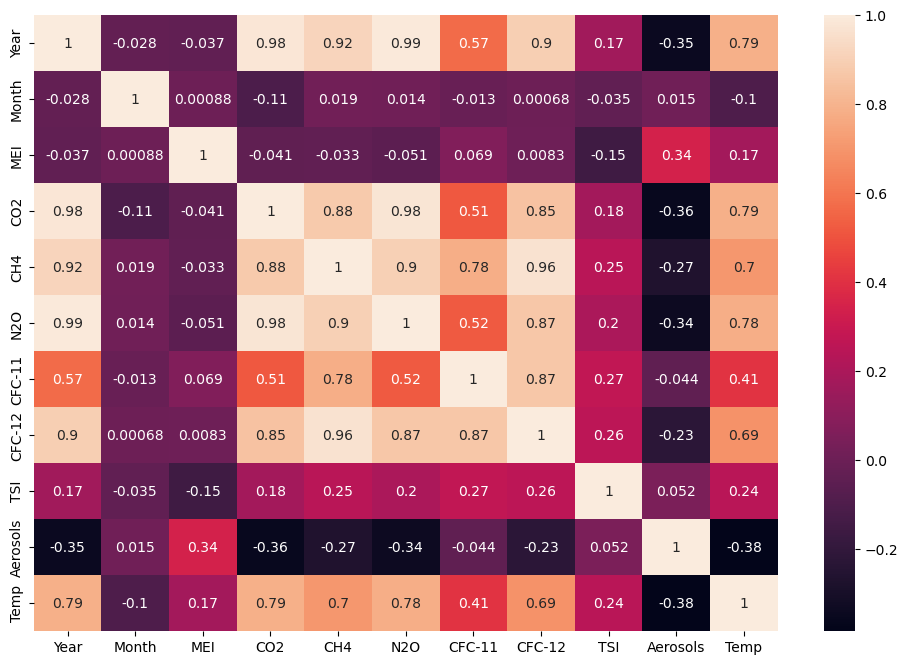

In [15]:
# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True)
plt.show()

In [16]:
# Which of the following independent variables is N2O highly correlated with
# (absolute correlation greater than 0.7)? Select all that apply.

# Check independent variables that are highly correlated with N2O where the absolute correlation is greater than 0.7

correlation_matrix['N2O'].sort_values(ascending=False) 

N2O         1.000000
Year        0.993845
CO2         0.976720
CH4         0.899839
CFC-12      0.867931
Temp        0.778639
CFC-11      0.522477
TSI         0.199757
Month       0.013632
MEI        -0.050820
Aerosols   -0.337055
Name: N2O, dtype: float64

In [23]:
#Which of the following independent variables is CFC.11 highly correlated with? Select all that apply.

correlation_matrix['CFC-11'].sort_values(ascending=False) 

CFC-11      1.000000
CFC-12      0.868985
CH4         0.779904
Year        0.569106
N2O         0.522477
CO2         0.514060
Temp        0.407710
TSI         0.272046
MEI         0.069000
Month      -0.013111
Aerosols   -0.043921
Name: CFC-11, dtype: float64